In [ ]:
#default_exp audio.core
#default_cls_lvl 3

In [ ]:
#export
from local.torch_basics import *
from local.test import *
from local.data.all import *
from local.notebook.showdoc import *

In [ ]:
from IPython.display import Audio
import torchaudio
from torchaudio.transforms import MelSpectrogram, MFCC, AmplitudeToDB

# Audio core

> Basic function to preprocess audio data before assembling it in a `DataBunch`.

In [ ]:
URLs.ESC50_SAMPLE = 'https://github.com/limeai/dataset/raw/master/esc50_sample.tgz'

In [ ]:
path = untar_data(URLs.ESC50_SAMPLE)
path.ls()

(#3) [/home/hiromi/.fastai/data/esc50_sample/dog,/home/hiromi/.fastai/data/esc50_sample/cat,/home/hiromi/.fastai/data/esc50_sample/meta.csv]

In [ ]:
t  = get_files(path, extensions='.wav', recurse=True)

In [ ]:
#export
audio_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('audio/'))

In [ ]:
#export
def get_audio_files(path, recurse=True, folders=None):
    "Get audio files in `path` recursively."
    return get_files(path, extensions=audio_extensions, recurse=recurse, folders=folders)

In [ ]:
test_eq(len(t), len(get_audio_files(path, recurse=True)))

In [ ]:
#export
def AudioGetter(suf='', recurse=True, folders=None):
    "Create `get_audio_files` partial function that searches path suffix `suf` and passes along `kwargs`"
    def _inner(o, recurse=recurse, folders=folders): return get_audio_files(o/suf, recurse, folders)
    return _inner

In [ ]:
test_eq(len(get_files(path, extensions='.wav', recurse=True, folders='dog')),
        len(AudioGetter(                       recurse=True, folders='dog')(path)))

### Basic Types

In [ ]:
def load_audio(fn, **kwargs):
    "Open and load an audio file"
    signal, sample_rate = torchaudio.load(fn)
    return signal, sample_rate

In [ ]:
class AudioSignal(tuple):
    "Basic type for an audio signal"
    def show(self, ctx=None, **kwargs):
        return display(Audio(data=self.signal, rate=self.sample_rate))
    
    @classmethod
    def create(cls, fn:Path): return cls(load_audio(fn))
    
    signal,sample_rate = add_props(lambda i,self: self[i])

In [ ]:
audio = AudioSignal.create(get_audio_files(path, recurse=True)[1])

In [ ]:
audio.show()

In [ ]:
class AudioSpectrogram(TensorImageBase): pass

In [ ]:
@delegates(to=MelSpectrogram)
class MelSpectrogramify(Transform):
    def __init__(self, **kwargs):
        print(kwargs)
        self.transformer = MelSpectrogram(**kwargs)
    def encodes(self, x:AudioSignal): return AudioSpectrogram(self.transformer(x.signal).detach())

In [ ]:
mel = MelSpectrogramify(sample_rate=audio.sample_rate)

{'sample_rate': 44100}


In [ ]:
mel_spectrogram = mel(audio)

In [ ]:
mel_spectrogram.shape

torch.Size([1, 128, 1103])

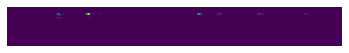

In [ ]:
mel_spectrogram.show()

In [ ]:
@delegates(AmplitudeToDB)
class AmplitudeToDBify(Transform):
    def __init__(self, **kwargs):
        self.transformer = AmplitudeToDB(**kwargs)
    def encodes(self, x:AudioSpectrogram):
        return self.transformer(x)

In [ ]:
amp = AmplitudeToDBify()

In [ ]:
mel_spectrogram_db = amp(mel_spectrogram)

In [ ]:
show_image??

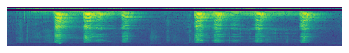

In [ ]:
mel_spectrogram_db.show()

## Export -

In [ ]:
#hide
from local.notebook.export import notebook2script
notebook2script(all_fs=True)